# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [78]:
anime.info()
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  12064 non-null  int64  
 1   Unnamed: 0.1  12064 non-null  int64  
 2   Unnamed: 0    12064 non-null  int64  
 3   anime_id      12064 non-null  int64  
 4   name          12063 non-null  object 
 5   genre         12064 non-null  object 
 6   type          12064 non-null  object 
 7   episodes      12064 non-null  object 
 8   rating        12064 non-null  float64
 9   members       12064 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813736 entries, 0 to 7813735
Data columns (total 6 columns):
 #   Column        Dtype
---  ------        -----
 0   Unnamed: 0.2  int64
 1   Unnamed: 0.1  int64
 2   Unnamed: 0    int64
 3   user_id       int64
 4   anime_id      int64
 5   rating        int64

In [79]:
# Check for missing data in the anime dataset
print(anime.isnull().sum())

Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
anime_id        0
name            1
genre           0
type            0
episodes        0
rating          0
members         0
dtype: int64


In [80]:
# For the 'genre' column, filling missing values with a default value, such as 'Unknown'
anime['genre'].fillna('Unknown', inplace=True)

In [81]:
# For the 'type' column, filling missing values with a default value, such as 'Unknown'
anime['type'].fillna('Unknown', inplace=True)

In [82]:
# Since the proportion of missing values is relatively low, 
# removing the rows with null values in the rating column should not significantly impact my analysis.
# In this case, it might be acceptable to drop rows with missing ratings, 
# as it can help you avoid introducing bias by imputing values.
anime.dropna(subset=['rating'], inplace=True)

In [83]:
print(anime.isnull().sum())

Unnamed: 0.2    0
Unnamed: 0.1    0
Unnamed: 0      0
anime_id        0
name            1
genre           0
type            0
episodes        0
rating          0
members         0
dtype: int64


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [84]:
# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for the 'rating' column
Q1_rating = anime['rating'].quantile(0.25)
Q3_rating = anime['rating'].quantile(0.75)

# Calculate the IQR for the 'rating' column
IQR_rating = Q3_rating - Q1_rating

# Define the upper and lower bounds for outliers in the 'rating' column
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for the 'members' column
Q1_members = anime['members'].quantile(0.25)
Q3_members = anime['members'].quantile(0.75)

# Calculate the IQR for the 'members' column
IQR_members = Q3_members - Q1_members

# Define the upper and lower bounds for outliers in the 'members' column
lower_bound_members = Q1_members - 1.5 * IQR_members
upper_bound_members = Q3_members + 1.5 * IQR_members

# Find the outliers in the 'rating' and 'members' columns
outliers_rating = anime[(anime['rating'] < lower_bound_rating) | (anime['rating'] > upper_bound_rating)]
outliers_members = anime[(anime['members'] < lower_bound_members) | (anime['members'] > upper_bound_members)]

# Print the outliers
print("Outliers in the 'rating' column:")
print(outliers_rating)
print("Outliers in the 'members' column:")
print(outliers_members)

Outliers in the 'rating' column:
       Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  anime_id  \
0                 0             0           0     32281   
1                 1             1           1      5114   
2                 2             2           2     28977   
3                 3             3           3      9253   
4                 4             4           4      9969   
...             ...           ...         ...       ...   
12039         12039         12039       12263     17825   
12043         12043         12043       12268     23677   
12045         12045         12045       12270     29994   
12049         12049         12049       12275     29111   
12052         12052         12052       12278     17833   

                                                   name  \
0                                         Kimi no Na wa   
1                       Fullmetal Alchemist Brotherhood   
2                                               Gintama   
3                     

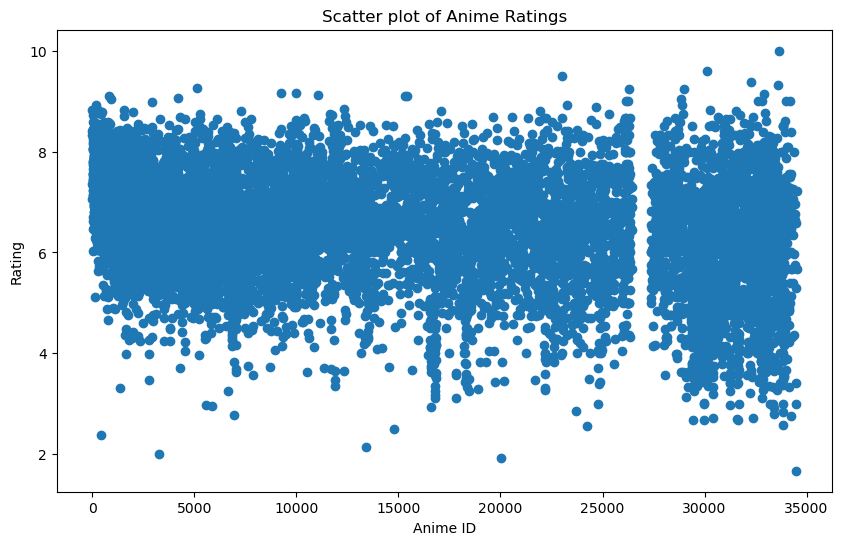

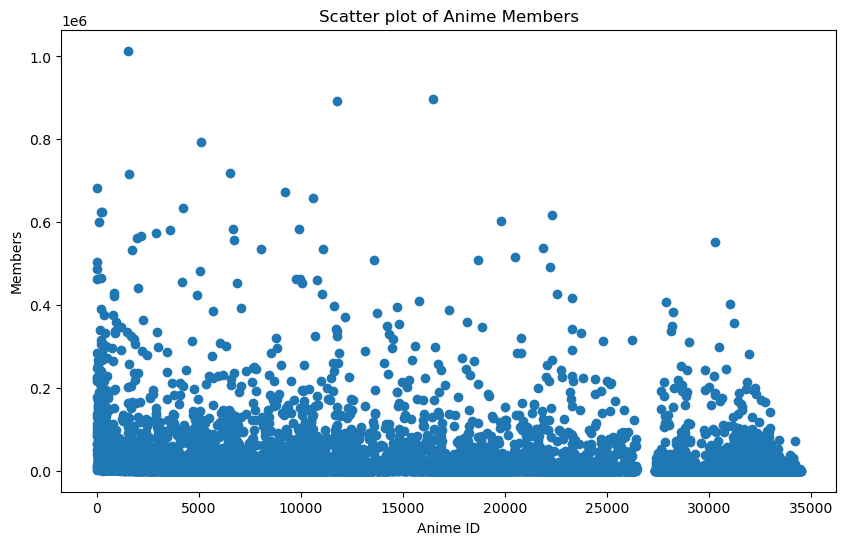

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(anime['anime_id'], anime['rating'])
plt.xlabel('Anime ID')
plt.ylabel('Rating')
plt.title('Scatter plot of Anime Ratings')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(anime['anime_id'], anime['members'])
plt.xlabel('Anime ID')
plt.ylabel('Members')
plt.title('Scatter plot of Anime Members')
plt.show()

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [86]:
# The only thing I am considering unnecessary data is episode column,
# but as of right now I think I would like to keep it since it might help me with visualization

import re
import html


def clean_anime_name(name):
    # Decode HTML entities
    name = html.unescape(name)
    
    # Replace non-alphanumeric characters with spaces
    name = re.sub(r'[^a-zA-Z0-9\s]', ' ', name)
    
    # Remove extra spaces
    name = re.sub(r'\s+', ' ', name).strip()
    
    return name

anime['name'] = anime['name'].apply(clean_anime_name)

In [87]:
anime.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,32281,Kimi no Na wa,"['Drama', 'Romance', 'School', 'Supernatural']",Movie,1,9.37,200630
1,1,1,1,5114,Fullmetal Alchemist Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,64,9.26,793665
2,2,2,2,28977,Gintama,"['Action', 'Comedy', 'Historical', 'Parody', '...",TV,51,9.25,114262
3,3,3,3,9253,Steins Gate,"['Sci-Fi', 'Thriller']",TV,24,9.17,673572
4,4,4,4,9969,Gintama,"['Action', 'Comedy', 'Historical', 'Parody', '...",TV,51,9.16,151266
5,5,5,5,32935,Haikyuu Karasuno Koukou VS Shiratorizawa Gakue...,"['Comedy', 'Drama', 'School', 'Shounen', 'Spor...",TV,10,9.15,93351
6,6,6,6,11061,Hunter x Hunter 2011,"['Action', 'Adventure', 'Shounen', 'Super Power']",TV,148,9.13,425855
7,7,7,7,820,Ginga Eiyuu Densetsu,"['Drama', 'Military', 'Sci-Fi', 'Space']",OVA,110,9.11,80679
8,8,8,8,15335,Gintama Movie Kanketsu hen Yorozuya yo Eien Nare,"['Action', 'Comedy', 'Historical', 'Parody', '...",Movie,1,9.10,72534
9,9,9,9,15417,Gintama Enchousen,"['Action', 'Comedy', 'Historical', 'Parody', '...",TV,13,9.11,81109


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [88]:
# Checking for duplicate entries: 
duplicate_rows = anime[anime.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [89]:
duplicate_rows = rating[rating.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [90]:
rating = rating.drop_duplicates()

In [91]:
# Define a function to expand the genres and calculate the average rating
def expand_genres_and_calculate_avg(df):
    expanded_genres = df.explode('genre')
    avg_rating_per_genre = expanded_genres.groupby('genre')['rating'].mean()
    return avg_rating_per_genre

In [92]:
# Split the genre column into a list of genres and apply the function
anime['genre'] = anime['genre'].str.split(', ')
average_ratings = expand_genres_and_calculate_avg(anime)
print(average_ratings)

genre
'Adventure'         6.845654
'Adventure']        6.187333
'Cars'              7.105938
'Cars']             5.346000
'Comedy'            6.945597
                      ...   
['Supernatural']    5.563571
['Thriller']        6.510000
['Unknown']         5.358511
['Vampire']         4.240000
['Yaoi']            5.645000
Name: rating, Length: 153, dtype: float64


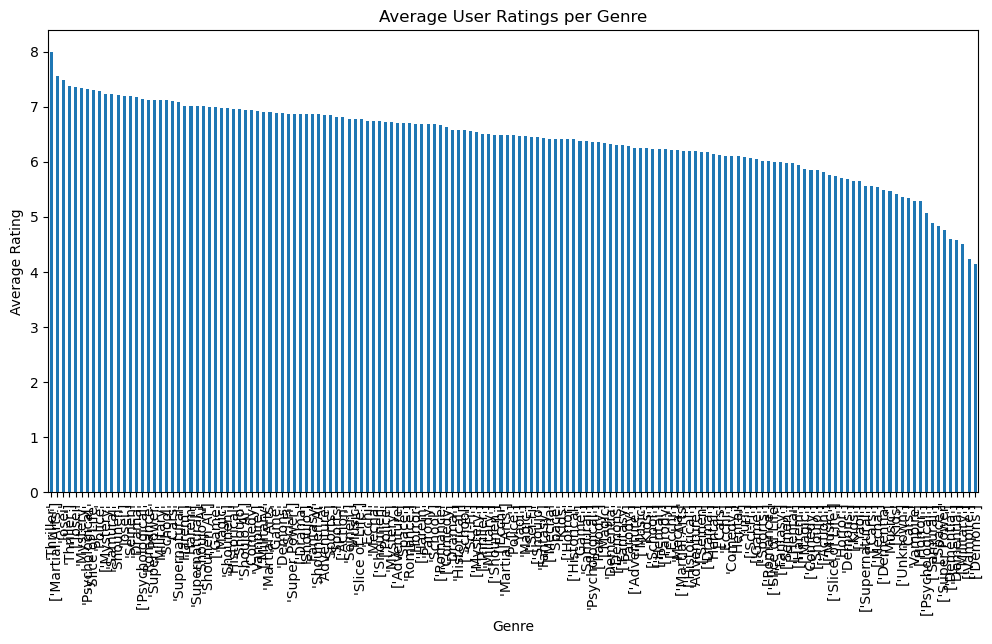

In [97]:
import matplotlib.pyplot as plt

average_ratings.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Average User Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

In [98]:
# Merge the two datasets on the 'anime_id' column
merged_df = pd.merge(rating, anime, on='anime_id', how='inner')

In [ ]:
anime.to_csv("anime.csv")
rating.to_csv("rating.csv")

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
   Yes, I hope so.
2. Did the process of cleaning your data give you new insights into your dataset?
   Yes, I was able to merge two of my data and also do some cleaning
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
   Based on my previous experience, I know raplacing null values would affect the outcome of my data, and that's what I remember    the most to see the difference between them in future.